## Home Credit Default Risk

In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
from sklearn.preprocessing import StandardScaler, MinMaxScaler
InteractiveShell.ast_node_interactivity='all'

### Read the data

In [2]:
df = pd.read_csv(r"D:\sanooj\datascience\data\home-credit-default-risk\application_test.csv")
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Memory treatment

In [3]:
df.memory_usage()

Index                            128
SK_ID_CURR                    389952
NAME_CONTRACT_TYPE            389952
CODE_GENDER                   389952
FLAG_OWN_CAR                  389952
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     389952
AMT_REQ_CREDIT_BUREAU_WEEK    389952
AMT_REQ_CREDIT_BUREAU_MON     389952
AMT_REQ_CREDIT_BUREAU_QRT     389952
AMT_REQ_CREDIT_BUREAU_YEAR    389952
Length: 122, dtype: int64

In [4]:
df.dtypes

SK_ID_CURR                      int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

In [5]:
start_mem = df.memory_usage().sum() / 1024**2
print('Memory usage before optimization is: {:.2f} MB'.format(start_mem))
for col in df.columns:
    col_type = df[col].dtype
    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        if str(col_type)[0:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                df[col] = df[col].astype(np.int64)
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)
    else:
        df[col] = df[col].astype('category')
end_mem = df.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

Memory usage before optimization is: 45.00 MB
Memory usage after optimization is: 9.40 MB
Decreased by 79.1%


### Describe

In [6]:
df.shape

# describe runs faster as compared to df.mean() because describe only finds mean on a subset of columns
df.describe()

(48744, 121)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.0,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,4.269500e+04
mean,277796.676350,0.397054,1.784545e+05,5.167597e+05,29426.343750,4.626689e+05,0.021240,-16068.084605,67485.366322,-inf,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009300,0.546875,inf
std,103169.547296,0.709047,1.015237e+05,3.653976e+05,16016.254883,3.366994e+05,0.014435,4325.900393,144348.507136,inf,...,0.039456,0.0,0.0,0.0,0.046387,0.046112,0.054047,0.110962,0.693359,1.838867e+00
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23728.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010010,-19637.000000,-2910.000000,-7460.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018845,-15785.000000,-1293.000000,-4488.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028656,-12496.000000,-296.000000,-1901.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000e+00
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072510,-7338.000000,365243.000000,0.0,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,1.700000e+01


### Columns, Index(rows) & Values

In [59]:
df.columns

type(df.columns)

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

pandas.core.indexes.base.Index

In [60]:
df.index

type(df.index)

RangeIndex(start=0, stop=48744, step=1)

pandas.core.indexes.range.RangeIndex

In [61]:
df.values

type(df.values)

array([[100001, 'Cash loans', 'F', ..., 0.0, 0.0, 0.0],
       [100005, 'Cash loans', 'M', ..., 0.0, 0.0, 3.0],
       [100013, 'Cash loans', 'M', ..., 0.0, 1.0, 4.0],
       ...,
       [456223, 'Cash loans', 'F', ..., 0.0, 3.0, 1.0],
       [456224, 'Cash loans', 'M', ..., 0.0, 0.0, 2.0],
       [456250, 'Cash loans', 'F', ..., 0.0, 1.0, 4.0]], dtype=object)

numpy.ndarray

### Series

In [62]:
df['SK_ID_CURR']

type(df['SK_ID_CURR'])

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int32

pandas.core.series.Series

#### Series has index, values but no columns

In [63]:
df['SK_ID_CURR'].index
df['SK_ID_CURR'].values
df['SK_ID_CURR'].columns

RangeIndex(start=0, stop=48744, step=1)

array([100001, 100005, 100013, ..., 456223, 456224, 456250])

AttributeError: 'Series' object has no attribute 'columns'

### Select subset of columns

In [64]:
df[['SK_ID_CURR','NAME_CONTRACT_TYPE']]

type(df[['SK_ID_CURR']])

,SK_ID_CURR,NAME_CONTRACT_TYPE
0,100001,Cash loans
1,100005,Cash loans
2,100013,Cash loans
3,100028,Cash loans
4,100038,Cash loans
...,...,...
48739,456221,Cash loans
48740,456222,Cash loans
48741,456223,Cash loans
48742,456224,Cash loans


pandas.core.frame.DataFrame

### Extract numeric columns using df.mean()

In [66]:
df.mean()

type(df.mean())

SK_ID_CURR                    2.777967e+05
CNT_CHILDREN                  3.970540e-01
AMT_INCOME_TOTAL              1.784545e+05
AMT_CREDIT                    5.167597e+05
AMT_ANNUITY                   2.942634e+04
                                  ...     
AMT_REQ_CREDIT_BUREAU_DAY     1.803398e-03
AMT_REQ_CREDIT_BUREAU_WEEK    2.786636e-03
AMT_REQ_CREDIT_BUREAU_MON     9.300232e-03
AMT_REQ_CREDIT_BUREAU_QRT     5.468750e-01
AMT_REQ_CREDIT_BUREAU_YEAR             inf
Length: 105, dtype: float64

pandas.core.series.Series

In [67]:
numerical_columns = df.mean().index
non_numerical_columns = []

for col in df.columns:
    if col not in numerical_columns:
        non_numerical_columns.append(col)
len(numerical_columns) , len(non_numerical_columns), len(df.columns)       

(105, 16, 121)

In [68]:
df.isna()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48740,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
48741,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
48742,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [69]:
df.isna().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

### Pick such columns with >30% non-null values

In [70]:
null_value_exclude_filter = (df.isna().sum()/df.shape[0])*100

In [71]:
len(null_value_exclude_filter)

121

In [72]:
selected_columns = null_value_exclude_filter[null_value_exclude_filter < 30]
excluded_columns = null_value_exclude_filter[null_value_exclude_filter > 30]

In [73]:
len(selected_columns)
len(excluded_columns)

71

50

In [74]:
null_value_exclude_filter

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 121, dtype: float64

In [75]:
## pick only the column names
selected_columns = selected_columns.index
excluded_columns = excluded_columns.index

In [76]:
df.drop(excluded_columns,axis=1,inplace=True)

In [77]:
df.shape

(48744, 71)

In [78]:
for col in df.columns:
    if col in numerical_columns:
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].value_counts().index[0],inplace=True)

In [79]:
df.isna().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 71, dtype: int64

In [87]:
for col in df.columns:
    if col in numerical_columns:
        q1 = np.quantile(df[col].values,0.25)
        q3 = np.quantile(df[col].values,0.75)
        iqr = q3 - q1
        ltv = q1 - (1.5 * iqr)
        utv = q3 + (1.5 * iqr)
        fillval = []
        for val in df[col].values:
            if (val < ltv) or (val > utv):
                fillval.append(df[col].median())
            else:
                fillval.append(val)
        df[col] = fillval

In [85]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,48744.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.000000
mean,277796.676350,0.357008,161822.303270,4.400947e+05,27415.952179,391290.912112,0.019504,-16068.084605,-1400.876313,-4938.958026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442495,1.867286
std,103169.547296,0.625773,62272.765432,2.302302e+05,12562.150494,208671.595143,0.011000,4325.900393,746.054455,3505.057057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608039,1.499499
min,100001.000000,0.000000,26941.500000,4.500000e+04,2295.000000,45000.000000,0.000253,-25195.000000,-3518.000000,-15720.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,188557.750000,0.000000,112500.000000,2.606400e+05,17973.000000,225000.000000,0.010010,-19637.000000,-1599.000000,-7429.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
50%,277549.000000,0.000000,157500.000000,4.500000e+05,26199.000000,396000.000000,0.018845,-15785.000000,-1293.000000,-4488.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
75%,367555.500000,1.000000,202500.000000,5.714865e+05,34825.500000,486000.000000,0.026398,-12496.000000,-1048.000000,-1901.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3.000000
max,456250.000000,2.000000,337500.000000,1.065681e+06,60426.000000,900000.000000,0.046234,-7338.000000,-1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,6.000000


In [92]:
for col in df.columns:
    if col in numerical_columns:
        mms = MinMaxScaler()
        mms.fit(df[[col]])
        x = mms.transform(df[[col]])
        df[col] = x

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [93]:
for col in df.columns:
    if col in numerical_columns:
        ss = StandardScaler()
        ss.fit(df[[col]])
        x = ss.transform(df[[col]])
        df[col] = x

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [94]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,4.874400e+04,...,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,4.874400e+04,4.874400e+04
mean,1.468622e-15,6.130871e-16,-9.672486e-16,1.098311e-16,1.815637e-17,4.609553e-16,4.526350e-16,1.589215e-16,-2.167468e-16,-1.916515e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.733007e-17,-2.088023e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000010e+00,1.000010e+00
min,-1.723353e+00,-5.705133e-01,-2.165990e+00,-1.728126e+00,-2.003152e+00,-1.813642e+00,-1.750057e+00,-2.109852e+00,-2.884293e+00,-3.075885e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.277500e-01,-1.245286e+00
25%,-8.649824e-01,-5.705133e-01,-7.920446e-01,-7.800519e-01,-7.515914e-01,-8.086631e-01,-8.630994e-01,-8.250195e-01,-1.284462e-01,-7.104214e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.277500e-01,-5.783900e-01
50%,-2.400698e-03,-5.705133e-01,-6.940992e-02,5.248067e-02,-9.491695e-02,1.460668e-01,-5.995405e-02,6.544014e-02,-1.284462e-01,1.286606e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.277500e-01,8.850633e-02
75%,8.700217e-01,1.027527e+00,6.532248e-01,5.721409e-01,5.912144e-01,4.726850e-01,6.266728e-01,8.257521e-01,9.857033e-02,8.667446e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.168995e-01,7.554027e-01
max,1.729727e+00,2.625568e+00,2.821129e+00,2.633826e+00,2.609734e+00,2.834385e+00,2.429935e+00,2.018117e+00,2.478897e+00,1.409109e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.561549e+00,2.756092e+00


(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 4.8624e+04, 1.0800e+02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+01]),
 array([-2607.131405  , -1928.92058444, -1250.70976388,  -572.49894332,
          105.71187724,   783.9226978 ,  1462.13351836,  2140.34433893,
         2818.55515949,  3496.76598005,  4174.97680061,  4853.18762117,
         5531.39844173,  6209.60926229,  6887.82008285,  7566.03090341,
         8244.24172398,  8922.45254454,  9600.6633651 , 10278.87418566,
        10957.08500622]),
 <a list of 20 Patch objects>)

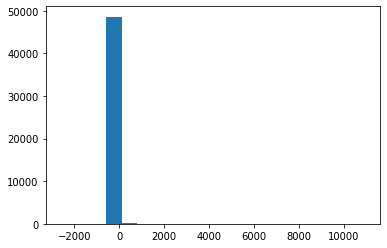

In [100]:
import matplotlib.pyplot as plt
#plt.hist(np.log1p(df_train['AMT_CREDIT']),bins=20)
#plt.hist(df['AMT_CREDIT'],bins=20)
plt.hist(1/(df['AMT_CREDIT']),bins=20)